<a href="https://colab.research.google.com/github/EisaacJC/ProgramacionCientificaFisUV/blob/main/classes/01_Clase_W3_Feb27_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Completar los siguientes campos y evaluar la celda

Titulo = 'Semana 27 feb, 2023' #@param {type:"string"}
Nombre = 'htapia' #@param {type:"string"}
Matricula = 'htapia' #@param {type:"string"}
Fecha = '2023-02-28' #@param {type:"date"}
print(Titulo)
print(Nombre)
print(Matricula)
print(Fecha)

Semana 27 feb, 2023
htapia
htapia
2023-02-28


## Rebote de una pelota cayendo al suelo
### Descripcion general del sistema. 
Hemos estudiado el movimiento de un objeto, una pelota, sujeta a la aceleracion debido a la gravedad cayendo verticalmente al suelo desde una altura determinada, a la cual llamamos $a$. Suponemos que en cada rebote la altura maxima que alcanza la pelota disminuye en un propocion $r$ de la altura anterior.

Determinamos que la distancia recorrida por la pelota en cada rebote puede separarse en una distancia hacia abajo y una distancia hacia arriba, enfocandonos en la distancia recorrida mientras la pelota cae, la cual denotamos por $d_n$, donde $n$ corresponde al movimeinto depues del $n$-esimo rebote con el suelo. La distancia recorrida en caida la obtenemos sumando las siguientes cantidades:

$$ d_k = a + a\cdot r + a\cdot r^2 + a\cdot r^3 + \cdots + a\cdot r^k, $$

y encontamos que la suma puede expresarse como $$ d_k=\frac{a}{1-r}(1-r^k)$$ valida si $r\neq 1$. En esta semana hemos desarrollado un par de algoritmos para calcular esta suma. Uno utiliza directamente esta expresion matematica, el otro utiliza un recursion.

## Metodo numerico
### Descripcion de la implementacion

El algoritmo A1 implementa la suma $$ d_k=\frac{a}{1-r}(1-r^k)$$ y puede expresarse como sigue:


```python
def d1(n,a,r):
    assert r!=1
    return a*(1-r**n)/(1-r)
``` 

El algoritmo A2 implementa la suma de manera recursiva:

```python
def d2(n,a,r):
    k=0
    sum=0
    while(k<n):
        sum = sum + a
        a = a*r
        k = k+1
    return sum
```

## Listado de codigo
### Incluir el codigo que se esta generando

El algoritmo A1 lo implementamos de la siguiente forma:

In [ ]:
def d1(n,a,r):
    try:
        assert r!=1, 'formula no valida para r=1'
    except AssertionError:
        print('formula no valida para r=1')
        raise 
    return a*(1-r**n)/(1-r)

a=20
r=8/10
n=10
d1(n,a,r)

89.26258176000002

El algoritmo A2 lo implementamos como sigue

In [ ]:
def d2(n,a,r):
    k=0
    sum=0
    while(k<n):
        sum = sum + a
        a = a*r
        k = k+1
    return sum
a=20
r=8/10
n=10
d2(n,a,r)

89.26258176

In [ ]:
# print rows with the values
a=20
r=8/10
[ [n, d1(n,a,r), d2(n,a,r)] for n in [10,50,100,500,1000] ]

[[10, 89.26258176000002, 89.26258176],
 [50, 99.99857275230731, 99.99857275230733],
 [100, 99.99999997962966, 99.99999997962966],
 [500, 100.00000000000003, 100.0],
 [1000, 100.00000000000003, 100.0]]

## Visualizacion de los resultados
### Incluir imagenes, graficas y demas recursos de visualizacion 

En esta seccion vamos a completar el modelo fisico de la pelota cayendo que comenzamos a trabajar hace una semana. El siguiente codigo modela la pelota cayendo desde una altura $a=20$ metros sujeto a una aceleracion constante $\vec{a}=(0,-9.81,0)\frac{m}{s^2}$. La simulacion calcula la trayectoria de la pelota por $t=5s$ en intervalos temporales (pasos de tiempo) de $dt=0.01s$. El suelo se supone esta localizado en el origen del sistema de coordenadas y esta representado por el plano azul en la simulacion. El siguiente codigo visualiza la trajectoria durante todo el intervalo temporal. Noten como la pelota pasa por encima del plano que representa el suelo. Necesitamos modificar el codigo para tomar en cuanta la presencia del piso y actuar cuando se encuentre. 

```python
scene = canvas(title='''Introduccion a la simulacion de objetos fisicos.
Masa en movimiento: aceleracion constante''')
scene.background=color.black

a=20 # metros
masa = sphere(pos=vector(0,a,0), radius=1., color=color.green)
piso = box(pos=vector(0,0,0),size=vector(14,0.2,4),color=color.blue)

t=0
dt=0.1
masa.a=vector(0,-9.81,0) # aceleracion constante en direccion vertical en unidades de m/s^2
masa.v=vector(0,0,0)

while(t<5):
    rate(100)
    # update velocity
    masa.v = masa.v + masa.a*dt
    # update position
    masa.pos = masa.pos + masa.v*dt
    # update time
    t = t+dt
```

In [ ]:
%%html

<iframe src="https://trinket.io/embed/glowscript/5bb30d8841?toggleCode=true" width="100%" height="600" frameborder="0" marginwidth="0" marginheight="0" allowfullscreen></iframe>


In [1]:
datos=[[0.01, 19.999, -0.0981], [0.02, 19.9971, -0.1962], [0.03, 19.9941, -0.2943], [0.04, 19.9902, -0.3924], [0.05, 19.9853, -0.4905], [0.06, 19.9794, -0.5886], [0.07, 19.9725, -0.6867], [0.08, 19.9647, -0.7848], [0.09, 19.9559, -0.8829], [0.1, 19.946, -0.981], [0.11, 19.9353, -1.0791], [0.12, 19.9235, -1.1772], [0.13, 19.9107, -1.2753], [0.14, 19.897, -1.3734], [0.15, 19.8823, -1.4715], [0.16, 19.8666, -1.5696], [0.17, 19.8499, -1.6677], [0.18, 19.8322, -1.7658], [0.19, 19.8136, -1.8639], [0.2, 19.794, -1.962], [0.21, 19.7734, -2.0601], [0.22, 19.7518, -2.1582], [0.23, 19.7292, -2.2563], [0.24, 19.7057, -2.3544], [0.25, 19.6812, -2.4525], [0.26, 19.6557, -2.5506], [0.27, 19.6292, -2.6487], [0.28, 19.6017, -2.7468], [0.29, 19.5733, -2.8449], [0.3, 19.5438, -2.943], [0.31, 19.5134, -3.0411], [0.32, 19.482, -3.1392], [0.33, 19.4497, -3.2373], [0.34, 19.4163, -3.3354], [0.35, 19.382, -3.4335], [0.36, 19.3467, -3.5316], [0.37, 19.3104, -3.6297], [0.38, 19.2731, -3.7278], [0.39, 19.2348, -3.8259], [0.4, 19.1956, -3.924], [0.41, 19.1554, -4.0221], [0.42, 19.1142, -4.1202], [0.43, 19.072, -4.2183], [0.44, 19.0288, -4.3164], [0.45, 18.9847, -4.4145], [0.46, 18.9395, -4.5126], [0.47, 18.8934, -4.6107], [0.48, 18.8463, -4.7088], [0.49, 18.7983, -4.8069], [0.5, 18.7492, -4.905], [0.51, 18.6992, -5.0031], [0.52, 18.6482, -5.1012], [0.53, 18.5962, -5.1993], [0.54, 18.5432, -5.2974], [0.55, 18.4893, -5.3955], [0.56, 18.4343, -5.4936], [0.57, 18.3784, -5.5917], [0.58, 18.3215, -5.6898], [0.59, 18.2636, -5.7879], [0.6, 18.2048, -5.886], [0.61, 18.1449, -5.9841], [0.62, 18.0841, -6.0822], [0.63, 18.0223, -6.1803], [0.64, 17.9595, -6.2784], [0.65, 17.8958, -6.3765], [0.66, 17.831, -6.4746], [0.67, 17.7653, -6.5727], [0.68, 17.6986, -6.6708], [0.69, 17.6309, -6.7689], [0.7, 17.5622, -6.867], [0.71, 17.4926, -6.9651], [0.72, 17.4219, -7.0632], [0.73, 17.3503, -7.1613], [0.74, 17.2777, -7.2594], [0.75, 17.2042, -7.3575], [0.76, 17.1296, -7.4556], [0.77, 17.0541, -7.5537], [0.78, 16.9775, -7.6518], [0.79, 16.9, -7.7499], [0.8, 16.8216, -7.848], [0.81, 16.7421, -7.9461], [0.82, 16.6617, -8.0442], [0.83, 16.5802, -8.1423], [0.84, 16.4978, -8.2404], [0.85, 16.4144, -8.3385], [0.86, 16.3301, -8.4366], [0.87, 16.2447, -8.5347], [0.88, 16.1584, -8.6328], [0.89, 16.0711, -8.7309], [0.9, 15.9828, -8.829], [0.91, 15.8935, -8.9271], [0.92, 15.8033, -9.0252], [0.93, 15.712, -9.1233], [0.94, 15.6198, -9.2214], [0.95, 15.5266, -9.3195], [0.96, 15.4325, -9.4176], [0.97, 15.3373, -9.5157], [0.98, 15.2412, -9.6138], [0.99, 15.1441, -9.7119], [1, 15.046, -9.81], [1.01, 14.9469, -9.9081], [1.02, 14.8468, -10.0062], [1.03, 14.7458, -10.1043], [1.04, 14.6437, -10.2024], [1.05, 14.5407, -10.3005], [1.06, 14.4367, -10.3986], [1.07, 14.3318, -10.4967], [1.08, 14.2258, -10.5948], [1.09, 14.1189, -10.6929], [1.1, 14.011, -10.791], [1.11, 13.9021, -10.8891], [1.12, 13.7922, -10.9872], [1.13, 13.6814, -11.0853], [1.14, 13.5695, -11.1834], [1.15, 13.4567, -11.2815], [1.16, 13.3429, -11.3796], [1.17, 13.2282, -11.4777], [1.18, 13.1124, -11.5758], [1.19, 12.9957, -11.6739], [1.2, 12.8779, -11.772], [1.21, 12.7592, -11.8701], [1.22, 12.6396, -11.9682], [1.23, 12.5189, -12.0663], [1.24, 12.3973, -12.1644], [1.25, 12.2746, -12.2625], [1.26, 12.151, -12.3606], [1.27, 12.0264, -12.4587], [1.28, 11.9009, -12.5568], [1.29, 11.7743, -12.6549], [1.3, 11.6468, -12.753], [1.31, 11.5183, -12.8511], [1.32, 11.3888, -12.9492], [1.33, 11.2583, -13.0473], [1.34, 11.1269, -13.1454], [1.35, 10.9944, -13.2435], [1.36, 10.861, -13.3416], [1.37, 10.7266, -13.4397], [1.38, 10.5912, -13.5378], [1.39, 10.4549, -13.6359], [1.4, 10.3175, -13.734], [1.41, 10.1792, -13.8321], [1.42, 10.0399, -13.9302], [1.43, 9.89962, -14.0283], [1.44, 9.75836, -14.1264], [1.45, 9.61611, -14.2245], [1.46, 9.47289, -14.3226], [1.47, 9.32868, -14.4207], [1.48, 9.18349, -14.5188], [1.49, 9.03732, -14.6169], [1.5, 8.89017, -14.715], [1.51, 8.74204, -14.8131], [1.52, 8.59293, -14.9112], [1.53, 8.44284, -15.0093], [1.54, 8.29176, -15.1074], [1.55, 8.13971, -15.2055], [1.56, 7.98667, -15.3036], [1.57, 7.83266, -15.4017], [1.58, 7.67766, -15.4998], [1.59, 7.52168, -15.5979], [1.6, 7.36472, -15.696], [1.61, 7.20678, -15.7941], [1.62, 7.04786, -15.8922], [1.63, 6.88795, -15.9903], [1.64, 6.72707, -16.0884], [1.65, 6.5652, -16.1865], [1.66, 6.40236, -16.2846], [1.67, 6.23853, -16.3827], [1.68, 6.07372, -16.4808], [1.69, 5.90793, -16.5789], [1.7, 5.74116, -16.677], [1.71, 5.57341, -16.7751], [1.72, 5.40468, -16.8732], [1.73, 5.23497, -16.9713], [1.74, 5.06427, -17.0694], [1.75, 4.8926, -17.1675], [1.76, 4.71994, -17.2656], [1.77, 4.54631, -17.3637], [1.78, 4.37169, -17.4618], [1.79, 4.19609, -17.5599], [1.8, 4.01951, -17.658], [1.81, 3.84195, -17.7561], [1.82, 3.66341, -17.8542], [1.83, 3.48388, -17.9523], [1.84, 3.30338, -18.0504], [1.85, 3.12189, -18.1485], [1.86, 2.93943, -18.2466], [1.87, 2.75598, -18.3447], [1.88, 2.57155, -18.4428], [1.89, 2.38614, -18.5409], [1.9, 2.19975, -18.639], [1.91, 2.01238, -18.7371], [1.92, 1.82403, -18.8352], [1.93, 1.6347, -18.9333], [1.94, 1.44438, -19.0314], [1.95, 1.25309, -19.1295], [1.96, 1.06081, -19.2276], [1.97, 0.867557, -19.3257], [1.98, 0.673319, -19.4238], [1.99, 0.4781, -19.5219], [2, 0.2819, -19.62], [2.01, 0.084719, -19.7181], [2.02, -0.113443, -19.8162], [2.03, -0.312586, -19.9143], [2.04, -0.154253, 15.8333], [2.05, 3.0998e-3, 15.7352], [2.06, 0.159471, 15.6371], [2.07, 0.314862, 15.539], [2.08, 0.469271, 15.4409], [2.09, 0.622699, 15.3428], [2.1, 0.775147, 15.2447], [2.11, 0.926613, 15.1466], [2.12, 1.0771, 15.0485], [2.13, 1.2266, 14.9504], [2.14, 1.37513, 14.8523], [2.15, 1.52267, 14.7542], [2.16, 1.66923, 14.6561], [2.17, 1.81481, 14.558], [2.18, 1.95941, 14.4599], [2.19, 2.10303, 14.3618], [2.2, 2.24567, 14.2637], [2.21, 2.38732, 14.1656], [2.22, 2.528, 14.0675], [2.23, 2.66769, 13.9694], [2.24, 2.80641, 13.8713], [2.25, 2.94414, 13.7732], [2.26, 3.08089, 13.6751], [2.27, 3.21666, 13.577], [2.28, 3.35145, 13.4789], [2.29, 3.48526, 13.3808], [2.3, 3.61808, 13.2827], [2.31, 3.74993, 13.1846], [2.32, 3.8808, 13.0865], [2.33, 4.01068, 12.9884], [2.34, 4.13958, 12.8903], [2.35, 4.26751, 12.7922], [2.36, 4.39445, 12.6941], [2.37, 4.52041, 12.596], [2.38, 4.64539, 12.4979], [2.39, 4.76939, 12.3998], [2.4, 4.8924, 12.3017], [2.41, 5.01444, 12.2036], [2.42, 5.1355, 12.1055], [2.43, 5.25557, 12.0074], [2.44, 5.37466, 11.9093], [2.45, 5.49278, 11.8112], [2.46, 5.60991, 11.7131], [2.47, 5.72606, 11.615], [2.48, 5.84123, 11.5169], [2.49, 5.95542, 11.4188], [2.5, 6.06862, 11.3207], [2.51, 6.18085, 11.2226], [2.52, 6.29209, 11.1245], [2.53, 6.40236, 11.0264], [2.54, 6.51164, 10.9283], [2.55, 6.61994, 10.8302], [2.56, 6.72727, 10.7321], [2.57, 6.83361, 10.634], [2.58, 6.93897, 10.5359], [2.59, 7.04334, 10.4378], [2.6, 7.14674, 10.3397], [2.61, 7.24916, 10.2416], [2.62, 7.35059, 10.1435], [2.63, 7.45105, 10.0454], [2.64, 7.55052, 9.94734], [2.65, 7.64901, 9.84924], [2.66, 7.74653, 9.75114], [2.67, 7.84306, 9.65304], [2.68, 7.9386, 9.55494], [2.69, 8.03317, 9.45684], [2.7, 8.12676, 9.35874], [2.71, 8.21937, 9.26064], [2.72, 8.31099, 9.16254], [2.73, 8.40164, 9.06444], [2.74, 8.4913, 8.96634], [2.75, 8.57998, 8.86824], [2.76, 8.66768, 8.77014], [2.77, 8.7544, 8.67204], [2.78, 8.84014, 8.57394], [2.79, 8.9249, 8.47584], [2.8, 9.00868, 8.37774], [2.81, 9.09148, 8.27964], [2.82, 9.17329, 8.18154], [2.83, 9.25413, 8.08344], [2.84, 9.33398, 7.98534], [2.85, 9.41285, 7.88724], [2.86, 9.49074, 7.78914], [2.87, 9.56765, 7.69104], [2.88, 9.64358, 7.59294], [2.89, 9.71853, 7.49484], [2.9, 9.7925, 7.39674], [2.91, 9.86549, 7.29864], [2.92, 9.93749, 7.20054], [2.93, 10.0085, 7.10244], [2.94, 10.0786, 7.00434], [2.95, 10.1476, 6.90624], [2.96, 10.2157, 6.80814], [2.97, 10.2828, 6.71004], [2.98, 10.3489, 6.61194], [2.99, 10.4141, 6.51384], [3, 10.4782, 6.41574], [3.01, 10.5414, 6.31764], [3.02, 10.6036, 6.21954], [3.03, 10.6648, 6.12144], [3.04, 10.725, 6.02334], [3.05, 10.7843, 5.92524], [3.06, 10.8426, 5.82714], [3.07, 10.8999, 5.72904], [3.08, 10.9562, 5.63094], [3.09, 11.0115, 5.53284], [3.1, 11.0658, 5.43474], [3.11, 11.1192, 5.33664], [3.12, 11.1716, 5.23854], [3.13, 11.223, 5.14044], [3.14, 11.2734, 5.04234], [3.15, 11.3229, 4.94424], [3.16, 11.3713, 4.84614], [3.17, 11.4188, 4.74804], [3.18, 11.4653, 4.64994], [3.19, 11.5108, 4.55184], [3.2, 11.5554, 4.45374], [3.21, 11.5989, 4.35564], [3.22, 11.6415, 4.25754], [3.23, 11.6831, 4.15944], [3.24, 11.7237, 4.06134], [3.25, 11.7633, 3.96324], [3.26, 11.802, 3.86514], [3.27, 11.8396, 3.76704], [3.28, 11.8763, 3.66894], [3.29, 11.912, 3.57084], [3.3, 11.9468, 3.47274], [3.31, 11.9805, 3.37464], [3.32, 12.0133, 3.27654], [3.33, 12.0451, 3.17844], [3.34, 12.0759, 3.08034], [3.35, 12.1057, 2.98224], [3.36, 12.1345, 2.88414], [3.37, 12.1624, 2.78604], [3.38, 12.1893, 2.68794], [3.39, 12.2152, 2.58984], [3.4, 12.2401, 2.49174], [3.41, 12.264, 2.39364], [3.42, 12.287, 2.29554], [3.43, 12.309, 2.19744], [3.44, 12.33, 2.09934], [3.45, 12.35, 2.00124], [3.46, 12.369, 1.90314], [3.47, 12.387, 1.80504], [3.48, 12.4041, 1.70694], [3.49, 12.4202, 1.60884], [3.5, 12.4353, 1.51074], [3.51, 12.4494, 1.41264], [3.52, 12.4626, 1.31454], [3.53, 12.4747, 1.21644], [3.54, 12.4859, 1.11834], [3.55, 12.4961, 1.02024], [3.56, 12.5054, 0.92214], [3.57, 12.5136, 0.82404], [3.58, 12.5209, 0.72594], [3.59, 12.5271, 0.62784], [3.6, 12.5324, 0.52974], [3.61, 12.5367, 0.43164], [3.62, 12.5401, 0.33354], [3.63, 12.5424, 0.23544], [3.64, 12.5438, 0.13734], [3.65, 12.5442, 0.03924], [3.66, 12.5436, -0.05886], [3.67, 12.542, -0.15696], [3.68, 12.5395, -0.25506], [3.69, 12.536, -0.35316], [3.7, 12.5315, -0.45126], [3.71, 12.526, -0.54936], [3.72, 12.5195, -0.64746], [3.73, 12.512, -0.74556], [3.74, 12.5036, -0.84366], [3.75, 12.4942, -0.94176], [3.76, 12.4838, -1.03986], [3.77, 12.4724, -1.13796], [3.78, 12.46, -1.23606], [3.79, 12.4467, -1.33416], [3.8, 12.4324, -1.43226], [3.81, 12.4171, -1.53036], [3.82, 12.4008, -1.62846], [3.83, 12.3835, -1.72656], [3.84, 12.3653, -1.82466], [3.85, 12.346, -1.92276], [3.86, 12.3258, -2.02086], [3.87, 12.3046, -2.11896], [3.88, 12.2825, -2.21706], [3.89, 12.2593, -2.31516], [3.9, 12.2352, -2.41326], [3.91, 12.2101, -2.51136], [3.92, 12.184, -2.60946], [3.93, 12.1569, -2.70756], [3.94, 12.1288, -2.80566], [3.95, 12.0998, -2.90376], [3.96, 12.0698, -3.00186], [3.97, 12.0388, -3.09996], [3.98, 12.0068, -3.19806], [3.99, 11.9739, -3.29616], [4, 11.9399, -3.39426], [4.01, 11.905, -3.49236], [4.02, 11.8691, -3.59046], [4.03, 11.8322, -3.68856], [4.04, 11.7943, -3.78666], [4.05, 11.7555, -3.88476], [4.06, 11.7157, -3.98286], [4.07, 11.6748, -4.08096], [4.08, 11.6331, -4.17906], [4.09, 11.5903, -4.27716], [4.1, 11.5465, -4.37526], [4.11, 11.5018, -4.47336], [4.12, 11.4561, -4.57146], [4.13, 11.4094, -4.66956], [4.14, 11.3617, -4.76766], [4.15, 11.313, -4.86576], [4.16, 11.2634, -4.96386], [4.17, 11.2128, -5.06196], [4.18, 11.1612, -5.16006], [4.19, 11.1086, -5.25816], [4.2, 11.055, -5.35626], [4.21, 11.0005, -5.45436], [4.22, 10.945, -5.55246], [4.23, 10.8885, -5.65056], [4.24, 10.831, -5.74866], [4.25, 10.7725, -5.84676], [4.26, 10.7131, -5.94486], [4.27, 10.6526, -6.04296], [4.28, 10.5912, -6.14106], [4.29, 10.5288, -6.23916], [4.3, 10.4655, -6.33726], [4.31, 10.4011, -6.43536], [4.32, 10.3358, -6.53346], [4.33, 10.2695, -6.63156], [4.34, 10.2022, -6.72966], [4.35, 10.1339, -6.82776], [4.36, 10.0646, -6.92586], [4.37, 9.99439, -7.02396], [4.38, 9.92317, -7.12206], [4.39, 9.85097, -7.22016], [4.4, 9.77778, -7.31826], [4.41, 9.70362, -7.41636], [4.42, 9.62848, -7.51446], [4.43, 9.55235, -7.61256], [4.44, 9.47524, -7.71066], [4.45, 9.39716, -7.80876], [4.46, 9.31809, -7.90686], [4.47, 9.23804, -8.00496], [4.48, 9.15701, -8.10306], [4.49, 9.075, -8.20116], [4.5, 8.992, -8.29926], [4.51, 8.90803, -8.39736], [4.52, 8.82307, -8.49546], [4.53, 8.73714, -8.59356], [4.54, 8.65022, -8.69166], [4.55, 8.56232, -8.78976], [4.56, 8.47345, -8.88786], [4.57, 8.38359, -8.98596], [4.58, 8.29275, -9.08406], [4.59, 8.20092, -9.18216], [4.6, 8.10812, -9.28026], [4.61, 8.01434, -9.37836], [4.62, 7.91957, -9.47646], [4.63, 7.82383, -9.57456], [4.64, 7.7271, -9.67266], [4.65, 7.62939, -9.77076], [4.66, 7.53071, -9.86886], [4.67, 7.43104, -9.96696], [4.68, 7.33038, -10.0651], [4.69, 7.22875, -10.1632], [4.7, 7.12614, -10.2613], [4.71, 7.02255, -10.3594], [4.72, 6.91797, -10.4575], [4.73, 6.81242, -10.5556], [4.74, 6.70588, -10.6537], [4.75, 6.59836, -10.7518], [4.76, 6.48986, -10.8499], [4.77, 6.38038, -10.948], [4.78, 6.26992, -11.0461], [4.79, 6.15848, -11.1442], [4.8, 6.04606, -11.2423], [4.81, 5.93266, -11.3404], [4.82, 5.81827, -11.4385], [4.83, 5.70291, -11.5366], [4.84, 5.58656, -11.6347], [4.85, 5.46923, -11.7328], [4.86, 5.35092, -11.8309], [4.87, 5.23163, -11.929], [4.88, 5.11136, -12.0271], [4.89, 4.99011, -12.1252], [4.9, 4.86788, -12.2233], [4.91, 4.74467, -12.3214], [4.92, 4.62047, -12.4195], [4.93, 4.49529, -12.5176], [4.94, 4.36914, -12.6157], [4.95, 4.242, -12.7138], [4.96, 4.11388, -12.8119], [4.97, 3.98478, -12.91], [4.98, 3.8547, -13.0081], [4.99, 3.72364, -13.1062], [5, 3.5916, -13.2043], [5.01, 3.45857, -13.3024], [5.02, 3.32457, -13.4005], [5.03, 3.18958, -13.4986], [5.04, 3.05362, -13.5967], [5.05, 2.91667, -13.6948], [5.06, 2.77874, -13.7929], [5.07, 2.63983, -13.891], [5.08, 2.49994, -13.9891], [5.09, 2.35907, -14.0872], [5.1, 2.21722, -14.1853], [5.11, 2.07438, -14.2834], [5.12, 1.93057, -14.3815], [5.13, 1.78577, -14.4796], [5.14, 1.64, -14.5777], [5.15, 1.49324, -14.6758], [5.16, 1.3455, -14.7739], [5.17, 1.19678, -14.872], [5.18, 1.04708, -14.9701], [5.19, 0.896398, -15.0682], [5.2, 0.744736, -15.1663], [5.21, 0.592092, -15.2644], [5.22, 0.438468, -15.3625], [5.23, 0.283862, -15.4606], [5.24, 0.128275, -15.5587], [5.25, -0.0282922, -15.6568], [5.26, -0.185841, -15.7549], [5.27, -0.34437, -15.853], [5.28, -0.218528, 12.5843], [5.29, -0.093666, 12.4862], [5.3, 0.0302146, 12.3881], [5.31, 0.153114, 12.29], [5.32, 0.275033, 12.1919], [5.33, 0.395971, 12.0938], [5.34, 0.515927, 11.9957], [5.35, 0.634903, 11.8976], [5.36, 0.752898, 11.7995], [5.37, 0.869911, 11.7014], [5.38, 0.985944, 11.6033], [5.39, 1.101, 11.5052], [5.4, 1.21507, 11.4071], [5.41, 1.32816, 11.309], [5.42, 1.44026, 11.2109], [5.43, 1.55139, 11.1128], [5.44, 1.66154, 11.0147], [5.45, 1.7707, 10.9166], [5.46, 1.87889, 10.8185], [5.47, 1.98609, 10.7204], [5.48, 2.09232, 10.6223], [5.49, 2.19756, 10.5242], [5.5, 2.30182, 10.4261], [5.51, 2.4051, 10.328], [5.52, 2.5074, 10.2299], [5.53, 2.60871, 10.1318], [5.54, 2.70905, 10.0337], [5.55, 2.80841, 9.93557], [5.56, 2.90678, 9.83747], [5.57, 3.00417, 9.73937], [5.58, 3.10059, 9.64127], [5.59, 3.19602, 9.54317], [5.6, 3.29047, 9.44507], [5.61, 3.38394, 9.34697], [5.62, 3.47643, 9.24887], [5.63, 3.56794, 9.15077], [5.64, 3.65846, 9.05267], [5.65, 3.74801, 8.95457], [5.66, 3.83657, 8.85647], [5.67, 3.92416, 8.75837], [5.68, 4.01076, 8.66027], [5.69, 4.09638, 8.56217], [5.7, 4.18102, 8.46407], [5.71, 4.26468, 8.36597], [5.72, 4.34736, 8.26787], [5.73, 4.42906, 8.16977], [5.74, 4.50977, 8.07167], [5.75, 4.58951, 7.97357], [5.76, 4.66826, 7.87547], [5.77, 4.74604, 7.77737], [5.78, 4.82283, 7.67927], [5.79, 4.89864, 7.58117], [5.8, 4.97347, 7.48307], [5.81, 5.04732, 7.38497], [5.82, 5.12019, 7.28687], [5.83, 5.19208, 7.18877], [5.84, 5.26299, 7.09067], [5.85, 5.33291, 6.99257], [5.86, 5.40186, 6.89447], [5.87, 5.46982, 6.79637], [5.88, 5.5368, 6.69827], [5.89, 5.6028, 6.60017], [5.9, 5.66783, 6.50207], [5.91, 5.73187, 6.40397], [5.92, 5.79492, 6.30587], [5.93, 5.857, 6.20777], [5.94, 5.9181, 6.10967], [5.95, 5.97821, 6.01157], [5.96, 6.03735, 5.91347], [5.97, 6.0955, 5.81537], [5.98, 6.15267, 5.71727], [5.99, 6.20887, 5.61917], [6, 6.26408, 5.52107], [6.01, 6.31831, 5.42297], [6.02, 6.37156, 5.32487], [6.03, 6.42382, 5.22677], [6.04, 6.47511, 5.12867], [6.05, 6.52542, 5.03057], [6.06, 6.57474, 4.93247], [6.07, 6.62308, 4.83437], [6.08, 6.67045, 4.73627], [6.09, 6.71683, 4.63817], [6.1, 6.76223, 4.54007], [6.11, 6.80665, 4.44197], [6.12, 6.85009, 4.34387], [6.13, 6.89255, 4.24577], [6.14, 6.93402, 4.14767], [6.15, 6.97452, 4.04957], [6.16, 7.01403, 3.95147], [6.17, 7.05257, 3.85337], [6.18, 7.09012, 3.75527], [6.19, 7.12669, 3.65717], [6.2, 7.16228, 3.55907], [6.21, 7.19689, 3.46097], [6.22, 7.23052, 3.36287], [6.23, 7.26317, 3.26477], [6.24, 7.29483, 3.16667], [6.25, 7.32552, 3.06857], [6.26, 7.35522, 2.97047], [6.27, 7.38395, 2.87237], [6.28, 7.41169, 2.77427], [6.29, 7.43845, 2.67617], [6.3, 7.46423, 2.57807], [6.31, 7.48903, 2.47997], [6.32, 7.51285, 2.38187], [6.33, 7.53569, 2.28377], [6.34, 7.55755, 2.18567], [6.35, 7.57842, 2.08757], [6.36, 7.59832, 1.98947], [6.37, 7.61723, 1.89137], [6.38, 7.63516, 1.79327], [6.39, 7.65211, 1.69517], [6.4, 7.66808, 1.59707], [6.41, 7.68307, 1.49897], [6.42, 7.69708, 1.40087], [6.43, 7.71011, 1.30277], [6.44, 7.72216, 1.20467], [6.45, 7.73322, 1.10657], [6.46, 7.74331, 1.00847], [6.47, 7.75241, 0.910368], [6.48, 7.76053, 0.812268], [6.49, 7.76768, 0.714168], [6.5, 7.77384, 0.616068], [6.51, 7.77902, 0.517968], [6.52, 7.78321, 0.419868], [6.53, 7.78643, 0.321768], [6.54, 7.78867, 0.223668], [6.55, 7.78992, 0.125568], [6.56, 7.7902, 0.027468], [6.57, 7.78949, -0.070632], [6.58, 7.78781, -0.168732], [6.59, 7.78514, -0.266832], [6.6, 7.78149, -0.364932], [6.61, 7.77686, -0.463032], [6.62, 7.77125, -0.561132], [6.63, 7.76465, -0.659232], [6.64, 7.75708, -0.757332], [6.65, 7.74853, -0.855432], [6.66, 7.73899, -0.953532], [6.67, 7.72847, -1.05163], [6.68, 7.71698, -1.14973], [6.69, 7.7045, -1.24783], [6.7, 7.69104, -1.34593], [6.71, 7.6766, -1.44403], [6.72, 7.66118, -1.54213], [6.73, 7.64478, -1.64023], [6.74, 7.62739, -1.73833], [6.75, 7.60903, -1.83643], [6.76, 7.58968, -1.93453], [6.77, 7.56936, -2.03263], [6.78, 7.54805, -2.13073], [6.79, 7.52576, -2.22883], [6.8, 7.50249, -2.32693], [6.81, 7.47824, -2.42503], [6.82, 7.45301, -2.52313], [6.83, 7.4268, -2.62123], [6.84, 7.3996, -2.71933], [6.85, 7.37143, -2.81743], [6.86, 7.34227, -2.91553], [6.87, 7.31214, -3.01363], [6.88, 7.28102, -3.11173], [6.89, 7.24892, -3.20983], [6.9, 7.21584, -3.30793], [6.91, 7.18178, -3.40603], [6.92, 7.14674, -3.50413], [6.93, 7.11072, -3.60223], [6.94, 7.07372, -3.70033], [6.95, 7.03573, -3.79843], [6.96, 6.99677, -3.89653], [6.97, 6.95682, -3.99463], [6.98, 6.91589, -4.09273], [6.99, 6.87398, -4.19083], [7, 6.8311, -4.28893], [7.01, 6.78722, -4.38703], [7.02, 6.74237, -4.48513], [7.03, 6.69654, -4.58323], [7.04, 6.64973, -4.68133], [7.05, 6.60193, -4.77943], [7.06, 6.55316, -4.87753], [7.07, 6.5034, -4.97563], [7.08, 6.45266, -5.07373], [7.09, 6.40095, -5.17183], [7.1, 6.34825, -5.26993], [7.11, 6.29457, -5.36803], [7.12, 6.23991, -5.46613], [7.13, 6.18426, -5.56423], [7.14, 6.12764, -5.66233], [7.15, 6.07004, -5.76043], [7.16, 6.01145, -5.85853], [7.17, 5.95188, -5.95663], [7.18, 5.89134, -6.05473], [7.19, 5.82981, -6.15283], [7.2, 5.7673, -6.25093], [7.21, 5.70381, -6.34903], [7.22, 5.63934, -6.44713], [7.23, 5.57388, -6.54523], [7.24, 5.50745, -6.64333], [7.25, 5.44004, -6.74143], [7.26, 5.37164, -6.83953], [7.27, 5.30227, -6.93763], [7.28, 5.23191, -7.03573], [7.29, 5.16057, -7.13383], [7.3, 5.08825, -7.23193], [7.31, 5.01495, -7.33003], [7.32, 4.94067, -7.42813], [7.33, 4.86541, -7.52623], [7.34, 4.78916, -7.62433], [7.35, 4.71194, -7.72243], [7.36, 4.63373, -7.82053], [7.37, 4.55455, -7.91863], [7.38, 4.47438, -8.01673], [7.39, 4.39323, -8.11483], [7.4, 4.3111, -8.21293], [7.41, 4.22799, -8.31103], [7.42, 4.1439, -8.40913], [7.43, 4.05883, -8.50723], [7.44, 3.97278, -8.60533], [7.45, 3.88574, -8.70343], [7.46, 3.79773, -8.80153], [7.47, 3.70873, -8.89963], [7.48, 3.61875, -8.99773], [7.49, 3.52779, -9.09583], [7.5, 3.43585, -9.19393], [7.51, 3.34293, -9.29203], [7.52, 3.24903, -9.39013], [7.53, 3.15415, -9.48823], [7.54, 3.05829, -9.58633], [7.55, 2.96144, -9.68443], [7.56, 2.86362, -9.78253], [7.57, 2.76481, -9.88063], [7.58, 2.66502, -9.97873], [7.59, 2.56426, -10.0768], [7.6, 2.46251, -10.1749], [7.61, 2.35978, -10.273], [7.62, 2.25606, -10.3711], [7.63, 2.15137, -10.4692], [7.64, 2.0457, -10.5673], [7.65, 1.93904, -10.6654], [7.66, 1.83141, -10.7635], [7.67, 1.72279, -10.8616], [7.68, 1.6132, -10.9597], [7.69, 1.50262, -11.0578], [7.7, 1.39106, -11.1559], [7.71, 1.27852, -11.254], [7.72, 1.165, -11.3521], [7.73, 1.05049, -11.4502], [7.74, 0.935011, -11.5483], [7.75, 0.818546, -11.6464], [7.76, 0.701101, -11.7445], [7.77, 0.582675, -11.8426], [7.78, 0.463267, -11.9407], [7.79, 0.342879, -12.0388], [7.8, 0.22151, -12.1369], [7.81, 0.0991593, -12.235], [7.82, -0.024172, -12.3331], [7.83, -0.148484, -12.4312], [7.84, -0.273778, -12.5293], [7.85, -0.174524, 9.92537], [7.86, -0.0762513, 9.82727], [7.87, 0.0210403, 9.72917], [7.88, 0.117351, 9.63107], [7.89, 0.212681, 9.53297], [7.9, 0.307029, 9.43487], [7.91, 0.400397, 9.33677], [7.92, 0.492784, 9.23867], [7.93, 0.584189, 9.14057], [7.94, 0.674614, 9.04247], [7.95, 0.764058, 8.94437], [7.96, 0.85252, 8.84627], [7.97, 0.940002, 8.74817], [7.98, 1.0265, 8.65007], [7.99, 1.11202, 8.55197], [8, 1.19656, 8.45387], [8.01, 1.28012, 8.35577], [8.02, 1.3627, 8.25767], [8.03, 1.44429, 8.15957], [8.04, 1.52491, 8.06147], [8.05, 1.60454, 7.96337], [8.06, 1.68319, 7.86527], [8.07, 1.76086, 7.76717], [8.08, 1.83755, 7.66907], [8.09, 1.91326, 7.57097], [8.1, 1.98799, 7.47287], [8.11, 2.06174, 7.37477], [8.12, 2.13451, 7.27667], [8.13, 2.20629, 7.17857], [8.14, 2.2771, 7.08047], [8.15, 2.34692, 6.98237], [8.16, 2.41576, 6.88427], [8.17, 2.48363, 6.78617], [8.18, 2.55051, 6.68807], [8.19, 2.61641, 6.58997], [8.2, 2.68132, 6.49187], [8.21, 2.74526, 6.39377], [8.22, 2.80822, 6.29567], [8.23, 2.87019, 6.19757], [8.24, 2.93119, 6.09947], [8.25, 2.9912, 6.00137], [8.26, 3.05023, 5.90327], [8.27, 3.10829, 5.80517], [8.28, 3.16536, 5.70707], [8.29, 3.22145, 5.60897], [8.3, 3.27656, 5.51087], [8.31, 3.33068, 5.41277], [8.32, 3.38383, 5.31467], [8.33, 3.436, 5.21657], [8.34, 3.48718, 5.11847], [8.35, 3.53738, 5.02037], [8.36, 3.58661, 4.92227], [8.37, 3.63485, 4.82417], [8.38, 3.68211, 4.72607], [8.39, 3.72839, 4.62797], [8.4, 3.77369, 4.52987], [8.41, 3.818, 4.43177], [8.42, 3.86134, 4.33367], [8.43, 3.9037, 4.23557], [8.44, 3.94507, 4.13747], [8.45, 3.98547, 4.03937], [8.46, 4.02488, 3.94127], [8.47, 4.06331, 3.84317], [8.48, 4.10076, 3.74507], [8.49, 4.13723, 3.64697], [8.5, 4.17272, 3.54887], [8.51, 4.20723, 3.45077], [8.52, 4.24075, 3.35267], [8.53, 4.2733, 3.25457], [8.54, 4.30486, 3.15647], [8.55, 4.33545, 3.05837], [8.56, 4.36505, 2.96027], [8.57, 4.39367, 2.86217], [8.58, 4.42131, 2.76407], [8.59, 4.44797, 2.66597], [8.6, 4.47365, 2.56787], [8.61, 4.49835, 2.46977], [8.62, 4.52206, 2.37167], [8.63, 4.5448, 2.27357], [8.64, 4.56655, 2.17547], [8.65, 4.58733, 2.07737], [8.66, 4.60712, 1.97927], [8.67, 4.62593, 1.88117], [8.68, 4.64376, 1.78307], [8.69, 4.66061, 1.68497], [8.7, 4.67648, 1.58687], [8.71, 4.69137, 1.48877], [8.72, 4.70528, 1.39067], [8.73, 4.7182, 1.29257], [8.74, 4.73015, 1.19447], [8.75, 4.74111, 1.09637], [8.76, 4.75109, 0.998266], [8.77, 4.76009, 0.900166], [8.78, 4.76812, 0.802066], [8.79, 4.77515, 0.703966], [8.8, 4.78121, 0.605866], [8.81, 4.78629, 0.507766], [8.82, 4.79039, 0.409666], [8.83, 4.7935, 0.311566], [8.84, 4.79564, 0.213466], [8.85, 4.79679, 0.115366], [8.86, 4.79696, 0.0172656], [8.87, 4.79616, -0.0808344], [8.88, 4.79437, -0.178934], [8.89, 4.7916, -0.277034], [8.9, 4.78784, -0.375134], [8.91, 4.78311, -0.473234], [8.92, 4.7774, -0.571334], [8.93, 4.7707, -0.669434], [8.94, 4.76303, -0.767534], [8.95, 4.75437, -0.865634], [8.96, 4.74474, -0.963734], [8.97, 4.73412, -1.06183], [8.98, 4.72252, -1.15993], [8.99, 4.70994, -1.25803], [9, 4.69638, -1.35613], [9.01, 4.68183, -1.45423], [9.02, 4.66631, -1.55233], [9.03, 4.64981, -1.65043], [9.04, 4.63232, -1.74853], [9.05, 4.61385, -1.84663], [9.06, 4.59441, -1.94473], [9.07, 4.57398, -2.04283], [9.08, 4.55257, -2.14093], [9.09, 4.53018, -2.23903], [9.1, 4.50681, -2.33713], [9.11, 4.48246, -2.43523], [9.12, 4.45712, -2.53333], [9.13, 4.43081, -2.63143], [9.14, 4.40351, -2.72953], [9.15, 4.37524, -2.82763], [9.16, 4.34598, -2.92573], [9.17, 4.31574, -3.02383], [9.18, 4.28452, -3.12193], [9.19, 4.25232, -3.22003], [9.2, 4.21914, -3.31813], [9.21, 4.18498, -3.41623], [9.22, 4.14983, -3.51433], [9.23, 4.11371, -3.61243], [9.24, 4.0766, -3.71053], [9.25, 4.03852, -3.80863], [9.26, 3.99945, -3.90673], [9.27, 3.9594, -4.00483], [9.28, 3.91837, -4.10293], [9.29, 3.87636, -4.20103], [9.3, 3.83337, -4.29913], [9.31, 3.7894, -4.39723], [9.32, 3.74445, -4.49533], [9.33, 3.69851, -4.59343], [9.34, 3.6516, -4.69153], [9.35, 3.6037, -4.78963], [9.36, 3.55482, -4.88773], [9.37, 3.50496, -4.98583], [9.38, 3.45412, -5.08393], [9.39, 3.4023, -5.18203], [9.4, 3.3495, -5.28013], [9.41, 3.29572, -5.37823], [9.42, 3.24096, -5.47633], [9.43, 3.18521, -5.57443], [9.44, 3.12849, -5.67253], [9.45, 3.07078, -5.77063], [9.46, 3.01209, -5.86873], [9.47, 2.95243, -5.96683], [9.48, 2.89178, -6.06493], [9.49, 2.83015, -6.16303], [9.5, 2.76753, -6.26113], [9.51, 2.70394, -6.35923], [9.52, 2.63937, -6.45733], [9.53, 2.57381, -6.55543], [9.54, 2.50728, -6.65353], [9.55, 2.43976, -6.75163], [9.56, 2.37127, -6.84973], [9.57, 2.30179, -6.94783], [9.58, 2.23133, -7.04593], [9.59, 2.15989, -7.14403], [9.6, 2.08747, -7.24213], [9.61, 2.01406, -7.34023], [9.62, 1.93968, -7.43833], [9.63, 1.86432, -7.53643], [9.64, 1.78797, -7.63453], [9.65, 1.71064, -7.73263], [9.66, 1.63234, -7.83073], [9.67, 1.55305, -7.92883], [9.68, 1.47278, -8.02693], [9.69, 1.39153, -8.12503], [9.7, 1.3093, -8.22313], [9.71, 1.22609, -8.32123], [9.72, 1.14189, -8.41933], [9.73, 1.05672, -8.51743], [9.74, 0.970562, -8.61553], [9.75, 0.883426, -8.71363], [9.76, 0.795308, -8.81173], [9.77, 0.70621, -8.90983], [9.78, 0.616131, -9.00793], [9.79, 0.52507, -9.10603], [9.8, 0.433029, -9.20413], [9.81, 0.340007, -9.30223], [9.82, 0.246003, -9.40033], [9.83, 0.151019, -9.49843], [9.84, 0.0550536, -9.59653], [9.85, -0.0418928, -9.69463], [9.86, -0.13982, -9.79273], [9.87, -0.238728, -9.89083], [9.88, -0.338618, -9.98893], [9.89, -0.259687, 7.89305], [9.9, -0.323813, -6.41254], [9.91, -0.273493, 5.03193], [9.92, -0.31473, -4.12364], [9.93, -0.282722, 3.20082], [9.94, -0.309309, -2.65875], [9.95, -0.28902, 2.0289], [9.96, -0.306232, -1.72122], [9.97, -0.293444, 1.27888], [9.98, -0.304656, -1.1212], [9.99, -0.296667, 0.798861], [10, -0.304039, -0.737189], [10.01, -0.299122, 0.491651], [10.02, -0.304037, -0.491421], [10.03, -0.301086, 0.295037], [10.04, -0.304428, -0.334129], [10.05, -0.302736, 0.169204], [10.06, -0.30507, -0.233463], [10.07, -0.304183, 0.0886703], [10.08, -0.305874, -0.169036], [10.09, -0.305503, 0.037129], [10.1, -0.306781, -0.127803], [10.11, -0.306739, 4.14255e-3], [10.12, -0.307753, -0.101414], [10.13, -0.307923, -0.0169688], [10.14, -0.308768, -0.084525], [10.15, -0.309073, -0.03048], [10.16, -0.30981, -0.073716], [10.17, -0.310201, -0.0391272], [10.18, -0.310869, -0.0667982], [10.19, -0.311316, -0.0446614], [10.2, -0.31194, -0.0623709], [10.21, -0.312422, -0.0482033], [10.22, -0.313017, -0.0595374], [10.23, -0.313522, -0.0504701], [10.24, -0.314099, -0.0577239], [10.25, -0.314618, -0.0519209], [10.26, -0.315184, -0.0565633], [10.27, -0.315712, -0.0528494], [10.28, -0.316271, -0.0558205], [10.29, -0.316805, -0.0534436], [10.3, -0.317359, -0.0553451], [10.31, -0.317897, -0.0538239], [10.32, -0.318447, -0.0550409], [10.33, -0.318988, -0.0540673], [10.34, -0.319536, -0.0548462], [10.35, -0.320079, -0.0542231], [10.36, -0.320626, -0.0547215], [10.37, -0.321169, -0.0543228], [10.38, -0.321715, -0.0546418], [10.39, -0.322259, -0.0543866], [10.4, -0.322805, -0.0545907], [10.41, -0.323349, -0.0544274], [10.42, -0.323895, -0.0545581], [10.43, -0.32444, -0.0544535], [10.44, -0.324985, -0.0545372], [10.45, -0.32553, -0.0544703], [10.46, -0.326075, -0.0545238], [10.47, -0.32662, -0.054481], [10.48, -0.327165, -0.0545152], [10.49, -0.32771, -0.0544878], [10.5, -0.328255, -0.0545097], [10.51, -0.3288, -0.0544922], [10.52, -0.329345, -0.0545062], [10.53, -0.32989, -0.054495], [10.54, -0.330435, -0.054504], [10.55, -0.33098, -0.0544968], [10.56, -0.331525, -0.0545026], [10.57, -0.33207, -0.054498], [10.58, -0.332615, -0.0545016], [10.59, -0.33316, -0.0544987], [10.6, -0.333705, -0.054501], [10.61, -0.33425, -0.0544992], [10.62, -0.334795, -0.0545007], [10.63, -0.33534, -0.0544995], [10.64, -0.335885, -0.0545004], [10.65, -0.33643, -0.0544997], [10.66, -0.336975, -0.0545003], [10.67, -0.33752, -0.0544998], [10.68, -0.338065, -0.0545002], [10.69, -0.33861, -0.0544999], [10.7, -0.339155, -0.0545001], [10.71, -0.3397, -0.0544999], [10.72, -0.340245, -0.0545001], [10.73, -0.34079, -0.0544999], [10.74, -0.341335, -0.0545], [10.75, -0.34188, -0.0545], [10.76, -0.342425, -0.0545], [10.77, -0.34297, -0.0545], [10.78, -0.343515, -0.0545], [10.79, -0.34406, -0.0545], [10.8, -0.344605, -0.0545], [10.81, -0.34515, -0.0545], [10.82, -0.345695, -0.0545], [10.83, -0.34624, -0.0545], [10.84, -0.346785, -0.0545], [10.85, -0.34733, -0.0545], [10.86, -0.347875, -0.0545], [10.87, -0.34842, -0.0545], [10.88, -0.348965, -0.0545], [10.89, -0.34951, -0.0545], [10.9, -0.350055, -0.0545], [10.91, -0.3506, -0.0545], [10.92, -0.351145, -0.0545], [10.93, -0.35169, -0.0545], [10.94, -0.352235, -0.0545], [10.95, -0.35278, -0.0545], [10.96, -0.353325, -0.0545], [10.97, -0.35387, -0.0545], [10.98, -0.354415, -0.0545], [10.99, -0.35496, -0.0545], [11, -0.355505, -0.0545], [11.01, -0.35605, -0.0545], [11.02, -0.356595, -0.0545], [11.03, -0.35714, -0.0545], [11.04, -0.357685, -0.0545], [11.05, -0.35823, -0.0545], [11.06, -0.358775, -0.0545], [11.07, -0.35932, -0.0545], [11.08, -0.359865, -0.0545], [11.09, -0.36041, -0.0545], [11.1, -0.360955, -0.0545], [11.11, -0.3615, -0.0545], [11.12, -0.362045, -0.0545], [11.13, -0.36259, -0.0545], [11.14, -0.363135, -0.0545], [11.15, -0.36368, -0.0545], [11.16, -0.364225, -0.0545], [11.17, -0.36477, -0.0545], [11.18, -0.365315, -0.0545], [11.19, -0.36586, -0.0545], [11.2, -0.366405, -0.0545], [11.21, -0.36695, -0.0545], [11.22, -0.367495, -0.0545], [11.23, -0.36804, -0.0545], [11.24, -0.368585, -0.0545], [11.25, -0.36913, -0.0545], [11.26, -0.369675, -0.0545], [11.27, -0.37022, -0.0545], [11.28, -0.370765, -0.0545], [11.29, -0.37131, -0.0545], [11.3, -0.371855, -0.0545], [11.31, -0.3724, -0.0545], [11.32, -0.372945, -0.0545], [11.33, -0.37349, -0.0545], [11.34, -0.374035, -0.0545], [11.35, -0.37458, -0.0545], [11.36, -0.375125, -0.0545], [11.37, -0.37567, -0.0545], [11.38, -0.376215, -0.0545], [11.39, -0.37676, -0.0545], [11.4, -0.377305, -0.0545], [11.41, -0.37785, -0.0545], [11.42, -0.378395, -0.0545], [11.43, -0.37894, -0.0545], [11.44, -0.379485, -0.0545], [11.45, -0.38003, -0.0545], [11.46, -0.380575, -0.0545], [11.47, -0.38112, -0.0545], [11.48, -0.381665, -0.0545], [11.49, -0.38221, -0.0545], [11.5, -0.382755, -0.0545], [11.51, -0.3833, -0.0545], [11.52, -0.383845, -0.0545], [11.53, -0.38439, -0.0545], [11.54, -0.384935, -0.0545], [11.55, -0.38548, -0.0545], [11.56, -0.386025, -0.0545], [11.57, -0.38657, -0.0545], [11.58, -0.387115, -0.0545], [11.59, -0.38766, -0.0545], [11.6, -0.388205, -0.0545], [11.61, -0.38875, -0.0545], [11.62, -0.389295, -0.0545], [11.63, -0.38984, -0.0545], [11.64, -0.390385, -0.0545], [11.65, -0.39093, -0.0545], [11.66, -0.391475, -0.0545], [11.67, -0.39202, -0.0545], [11.68, -0.392565, -0.0545], [11.69, -0.39311, -0.0545], [11.7, -0.393655, -0.0545], [11.71, -0.3942, -0.0545], [11.72, -0.394745, -0.0545], [11.73, -0.39529, -0.0545], [11.74, -0.395835, -0.0545], [11.75, -0.39638, -0.0545], [11.76, -0.396925, -0.0545], [11.77, -0.39747, -0.0545], [11.78, -0.398015, -0.0545], [11.79, -0.39856, -0.0545], [11.8, -0.399105, -0.0545], [11.81, -0.39965, -0.0545], [11.82, -0.400195, -0.0545], [11.83, -0.40074, -0.0545], [11.84, -0.401285, -0.0545], [11.85, -0.40183, -0.0545], [11.86, -0.402375, -0.0545], [11.87, -0.40292, -0.0545], [11.88, -0.403465, -0.0545], [11.89, -0.40401, -0.0545], [11.9, -0.404555, -0.0545], [11.91, -0.4051, -0.0545], [11.92, -0.405645, -0.0545], [11.93, -0.40619, -0.0545], [11.94, -0.406735, -0.0545], [11.95, -0.40728, -0.0545], [11.96, -0.407825, -0.0545], [11.97, -0.40837, -0.0545], [11.98, -0.408915, -0.0545], [11.99, -0.40946, -0.0545], [12, -0.410005, -0.0545], [12.01, -0.41055, -0.0545], [12.02, -0.411095, -0.0545], [12.03, -0.41164, -0.0545], [12.04, -0.412185, -0.0545], [12.05, -0.41273, -0.0545], [12.06, -0.413275, -0.0545], [12.07, -0.41382, -0.0545], [12.08, -0.414365, -0.0545], [12.09, -0.41491, -0.0545], [12.1, -0.415455, -0.0545], [12.11, -0.416, -0.0545], [12.12, -0.416545, -0.0545]]


In [3]:
t,y,vy=list(zip(*datos))

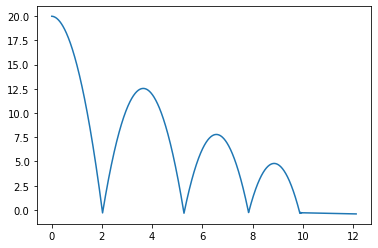

In [4]:
import matplotlib.pyplot as plt

plt.plot(t,y)

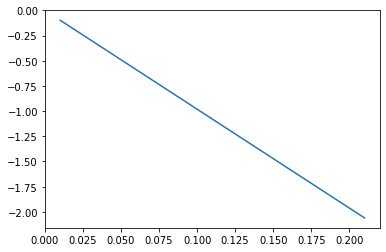

In [ ]:
plt.plot(t,vy)

In [ ]:
# codigo de vpython si lo tienen localmente instalado pueden ejecutarlo
from vpython import *Web VPython 3.2

# codigo de vpython si lo tienen localmente instalado pueden ejecutarlo
# from vpython import *

scene = canvas(title='''Introduccion a la simulacion de objetos fisicos.
Masa en movimiento: aceleracion constante''', align='left')
scene.background=color.black
g1 = graph(xtitle='t[s]', ytitle='y[m]', width=500, height=150, align='left')
fp = gcurve(color=color.blue)
 
g2 = graph(xtitle='t[s]', ytitle='vy[m/s]', width=500, height=150, align='left')
fv = gcurve(color=color.red)

h = 20
r = 0.5
g = 9.81 
tc = sqrt(2*h/g)
masa = sphere(pos=vector(0,h,0), radius=r, color=color.yellow, make_trail=True, trail_type='points', interval=10, retain=10)
piso = box(pos=vector(0,0-r,0),size=vector(14,0.2,4),color=color.white)

t = 0
dt = 0.01
masa.a = vector(0,-g,0)
masa.v = vector(0,0,0)
masa.pos = masa.pos + masa.v*dt

data = []

while(t<6*tc):
    rate(100)
    # check collision
    if masa.pos.y < piso.pos.y + 0.5*masa.radius:
      masa.v.y = -masa.v.y
    # update velocity
    masa.v = masa.v + masa.a*dt
    # update position
    masa.pos = masa.pos + masa.v*dt
    # plot handle
    fp.plot(t, masa.pos.y)
    fv.plot(t, masa.v.y)
    # update time
    t = t+dt
    # print([t, masa.pos.y, masa.v.y])
    data.append([t,masa.pos.y,masa.v.y])
print(data)
#download("data.txt", data)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Discusion
### Incluir una discusion de los resultados obtenidos

## Critica
### Critica o comentarios sobre el metodo y las herramientas